In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


df = pd.read_csv(r"C:\Users\agarw\Downloads\boston_housing.csv")
print(df.head())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


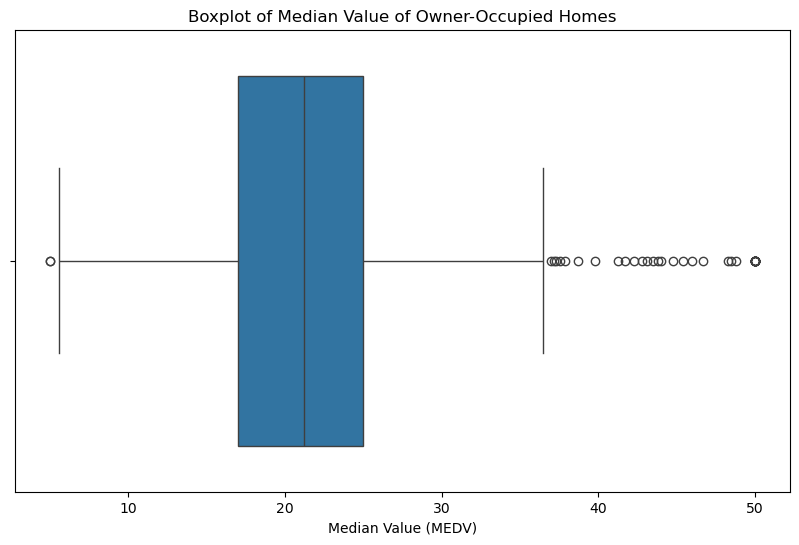

In [7]:
### 1. Boxplot for Median Value of Owner-Occupied Homes
plt.figure(figsize=(10, 6))
sns.boxplot(x='MEDV', data=df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (MEDV)')
plt.show()

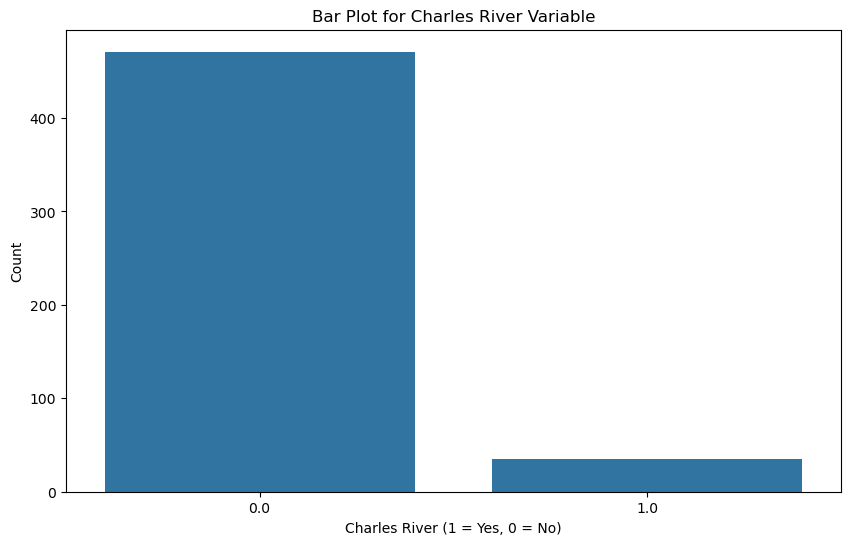

In [8]:
### 2. Bar Plot for the Charles River Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=df) 
plt.title('Bar Plot for Charles River Variable')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

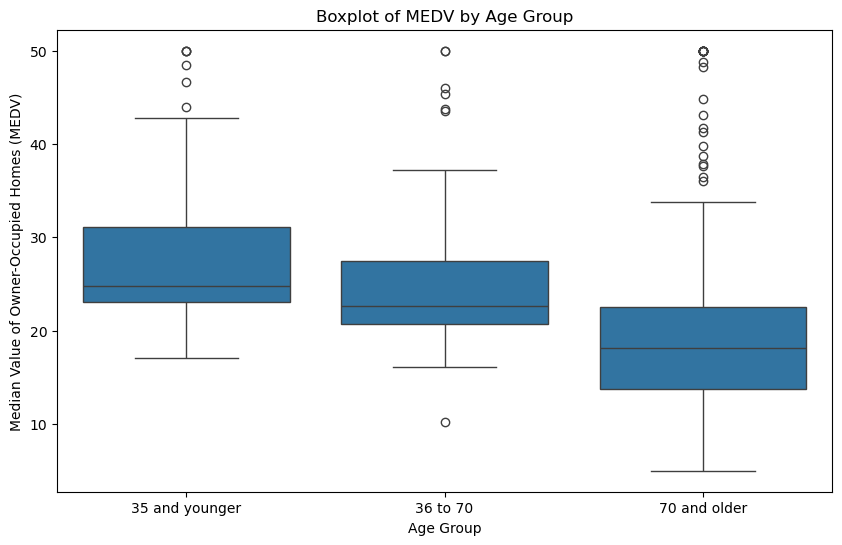

In [10]:
### 3. Boxplot for MEDV vs. Age Variable
# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '36 to 70', '70 and older']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()


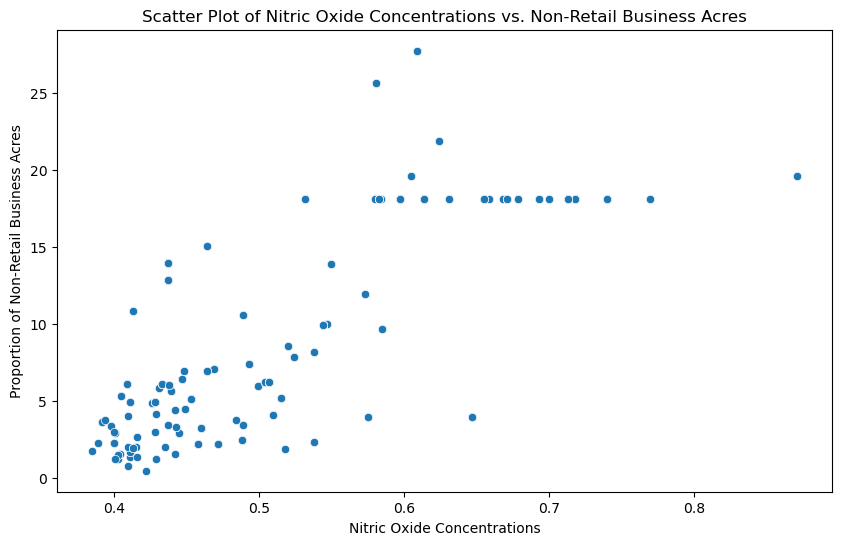

In [11]:
### 4. Scatter Plot for Nitric Oxide Concentrations vs. Non-Retail Business Acres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df)  # NOX is Nitric Oxide concentration and INDUS is non-retail business acres
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

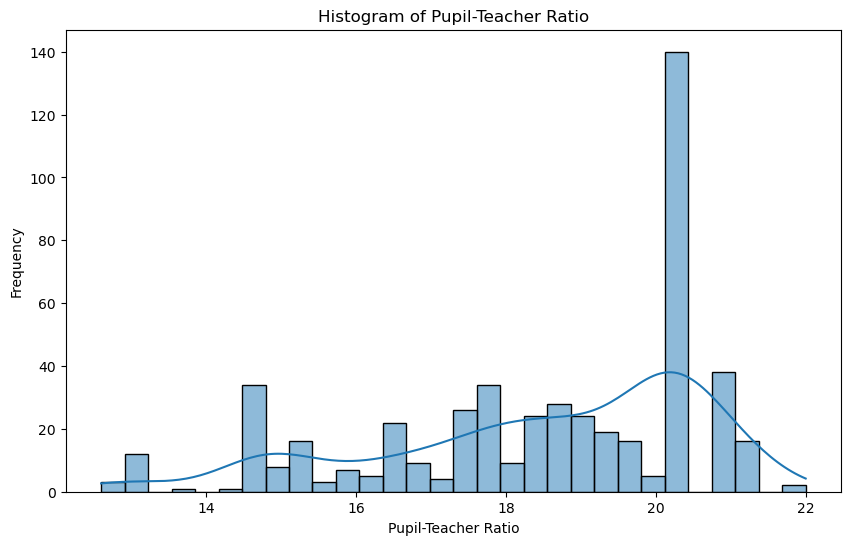

In [12]:
### 5. Histogram for Pupil-Teacher Ratio Variable
plt.figure(figsize=(10, 6))
sns.histplot(df['PTRATIO'], bins=30, kde=True)  # PTRATIO is the pupil-teacher ratio
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Statistical Tests


In [13]:
# 1. T-test for Median Value of Houses Bounded by the Charles River
group1 = df[df['CHAS'] == 1]['MEDV']
group2 = df[df['CHAS'] == 0]['MEDV']

t_stat, p_value_ttest = stats.ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value_ttest}")

# Hypothesis
print("Hypothesis for T-test:")
print("H0: There is no significant difference in median values of houses bounded by the Charles River.")
print("Ha: There is a significant difference in median values of houses bounded by the Charles River.")


T-test: t-statistic = 3.996437466090509, p-value = 7.390623170519905e-05
Hypothesis for T-test:
H0: There is no significant difference in median values of houses bounded by the Charles River.
Ha: There is a significant difference in median values of houses bounded by the Charles River.


In [14]:
# 2. ANOVA for Age Groups
f_stat, p_value_anova = stats.f_oneway(
    df[df['AGE_GROUP'] == '35 and younger']['MEDV'],
    df[df['AGE_GROUP'] == '36 to 70']['MEDV'],
    df[df['AGE_GROUP'] == '70 and older']['MEDV']
)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_value_anova}")

# Hypothesis
print("Hypothesis for ANOVA:")
print("H0: There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
print("Ha: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")


ANOVA: F-statistic = 36.40764999196599, p-value = 1.7105011022702984e-15
Hypothesis for ANOVA:
H0: There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.
Ha: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [15]:
# 3. Pearson Correlation for NOX and INDUS
correlation, p_value_correlation = stats.pearsonr(df['NOX'], df['INDUS'])
print(f"Pearson Correlation: correlation = {correlation}, p-value = {p_value_correlation}")

# Hypothesis
print("Hypothesis for Pearson Correlation:")
print("H0: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
print("Ha: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")


Pearson Correlation: correlation = 0.763651446920915, p-value = 7.913361061241167e-98
Hypothesis for Pearson Correlation:
H0: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
Ha: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [16]:
# 4. Regression Analysis for Weighted Distance to Employment Centers
X = df['DIS']  # Weighted distance to Boston employment centers
y = df['MEDV']  # Median value of owner-occupied homes
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

# Hypothesis
print("Hypothesis for Regression Analysis:")
print("H0: There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
print("Ha: There is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        22:36:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0